## Fitting a Logistic Regression Model

In [1]:
# importing the necassary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [2]:
columns_for_model = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\Python files\columns_for_model.csv")

In [3]:
columns_for_model.columns

Index(['Diverted', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Cancelled',
       'CarrierDelay', 'DepDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Origin lat', 'Origin long', 'Dest lat',
       'Dest long', 'UniqueCarrier Encoded', 'airport Encoded',
       'Month Encoded', 'DayOfWeek Encoded'],
      dtype='object')

In [4]:
# separating the dependent variables from the target/response variable

X = columns_for_model[['CRSDepTime','CRSArrTime', 'Distance', 'Cancelled', 'CarrierDelay', 'DepDelay', 
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'airport Encoded',
       'Origin lat', 'Origin long', 'Dest lat', 'Dest long', 'UniqueCarrier Encoded',
                       'Month Encoded', 'DayOfWeek Encoded']]
y = columns_for_model['Diverted']

In [5]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [6]:
y_train.value_counts()

Diverted
0    5197565
1      12002
Name: count, dtype: int64

In [7]:
# the Concatenate X_train and y_train to perform undersampling to make a new data frame with the train data only
trained_df = pd.concat([X_train, y_train], axis=1)
trained_df

,CRSDepTime,CRSArrTime,Distance,Cancelled,CarrierDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,airport Encoded,Origin lat,Origin long,Dest lat,Dest long,UniqueCarrier Encoded,Month Encoded,DayOfWeek Encoded,Diverted
600389,1140,1305,417,0,0,21.0,0,0,0,0,242,37.361862,-121.929009,32.733556,-117.189657,11,3,2,0
2116564,1915,2335,1471,0,0,4.0,0,0,0,0,56,32.895951,-97.037200,41.938874,-72.683228,1,3,3,0
5796692,1900,2022,306,0,0,2.0,0,0,0,0,157,38.174389,-85.736000,42.212059,-83.348836,12,11,1,0
1469013,1130,1435,775,0,28,52.0,0,13,0,5,60,39.858408,-104.667002,30.194533,-97.669872,8,1,5,0
6024641,2029,2302,2089,0,0,-4.0,0,0,0,0,234,38.852083,-77.037722,36.080361,-115.152333,16,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81348,1735,2020,616,0,0,-5.0,0,0,0,0,192,36.124477,-86.678182,28.428889,-81.316028,17,11,6,0
1494100,2135,2245,804,0,15,22.0,0,0,0,0,60,39.858408,-104.667002,39.498576,-119.768065,8,6,6,0
1859584,2005,2040,449,0,0,21.0,0,0,0,0,289,33.640444,-84.426944,30.533161,-91.149634,7,4,1,0
7435223,2036,2142,399,0,0,-15.0,0,0,0,0,21,60.779776,-161.837998,61.174320,-149.996186,3,8,5,0


### Using SMOTE (Synthetic Minority Over Sampling Technique)

In [8]:
# importing SMOTE from the imblearn library
from imblearn.over_sampling import SMOTE

In [9]:
smote = SMOTE(random_state=13)

# oversampling using the trained data  by synthesizing new samples in between existing minority class samples
resampled_X_train, resampled_y_train = smote.fit_resample(X_train, y_train)

# fitting a standard scalar to ensure a consistent scale leading to better performance
scaler = StandardScaler()
resampled_X_train_scaled = scaler.fit_transform(resampled_X_train)
X_test_scaled = scaler.transform(X_test) 

# Fitting a logistic regression model
smote_model = LogisticRegression(solver='sag', class_weight='balanced') # solver 'sag' for better performance with large datasets
smote_model.fit(resampled_X_train, resampled_y_train)

# Predict on the testing set
y_pred = smote_model.predict(X_test)

# model performance metrics
accuracy_reading = accuracy_score(y_test, y_pred)
cl_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_reading)
print(cl_report)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.7684236645597741
              precision    recall  f1-score   support

           0       1.00      0.77      0.87   2227528
           1       0.01      0.65      0.01      5144

    accuracy                           0.77   2232672
   macro avg       0.50      0.71      0.44   2232672
weighted avg       1.00      0.77      0.87   2232672



### Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1712274,  515254],
       [   1780,    3364]], dtype=int64)

### ROC (Reciever Operating Characteristic) curve and score¶

In [11]:
# predicting the class probabilities for the test data
pred_prob = smote_model.predict_proba(X_test)

# ROC curve calculation
fpr, tpr, thresh = roc_curve(y_test, pred_prob[: , 1])

In [12]:
# library to calculate the roc auc score
from sklearn.metrics import roc_auc_score
auc_roc_score = roc_auc_score(y_test, pred_prob[:, 1])

### Plotting the ROC curve

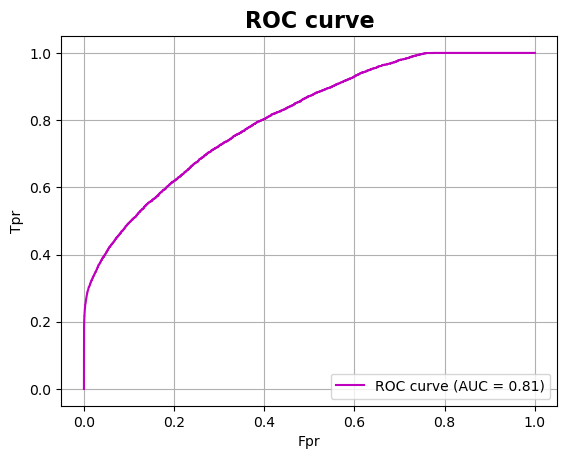

In [14]:
plt.plot(fpr, tpr, color='m', label=f'ROC curve (AUC = {auc_roc_score:.2f})')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True)

### Extracting the coefficients

In [15]:
# extracting the coefficients of the model
coefficients = smote_model.coef_
intercept = smote_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.00063329  0.0005767   0.00060129 -0.54845524 -0.44993576  0.08222279
  -0.30305752 -0.40012221 -0.18061369 -0.45342597  0.00074562  0.01761826
   0.00129766  0.00787798  0.00989494 -0.02503088 -0.04095439 -0.13724807]]
Intercept: [0.22914593]


### Plotting a horizontal bar chart

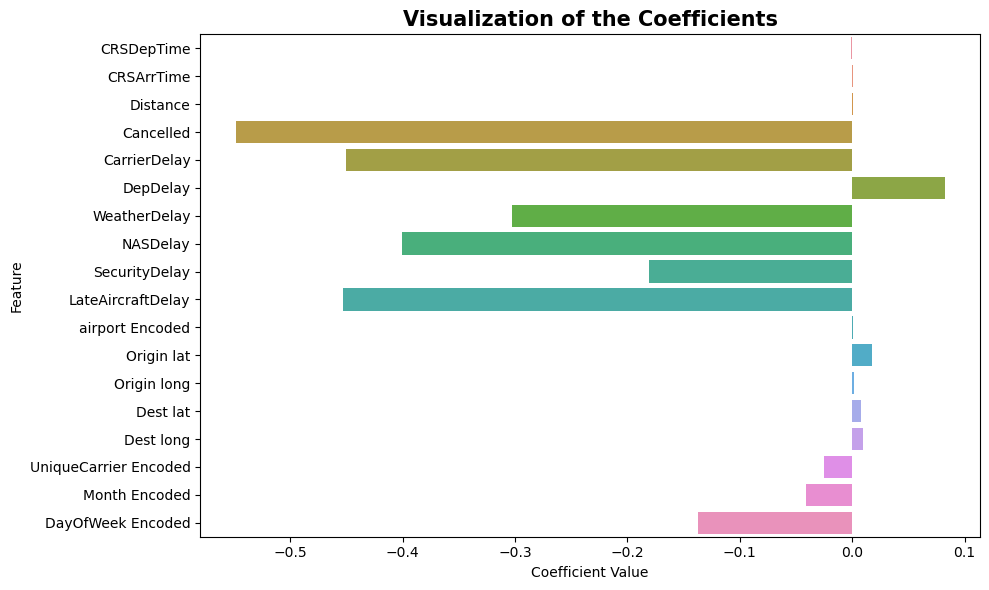

In [16]:
features = X.columns  # Assuming X is your DataFrame or array with feature names

plt.figure(figsize=(10, 6))

# Plotting a bar chart
sns.barplot(x=coefficients[0], y=features)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Visualization of the Coefficients", fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()